In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv("trec_eval_output_example.txt",delimiter='\t',header=None,names=["Desc","Id","Value"])

In [177]:
# remove whitespaces that came from trec_eval 
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [178]:
recall_order = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
iprec_at_recallN = ["iprec_at_recall_0.00", "iprec_at_recall_0.10","iprec_at_recall_0.20","iprec_at_recall_0.30",
                    "iprec_at_recall_0.40","iprec_at_recall_0.50","iprec_at_recall_0.60","iprec_at_recall_0.70",
                    "iprec_at_recall_0.80","iprec_at_recall_0.90","iprec_at_recall_1.00"]
P_N = ["P_5","P_10","P_15","P_20","P_30","P_100","P_200","P_500","P_1000"]

In [179]:
#create double index
df = df.set_index(['Id', 'Desc'])
#it's a convention to call sort_index() after a double index has been created
df = df.sort_index()
# this is to help navigate in a double index dataframe
idx = pd.IndexSlice

In [180]:
#example of a query. Get the <Value> column where the index is "103" for the Id column, and is a list of strings for the <Desc> column
df.loc[idx['103',iprec_at_recallN], 'Value']

Id   Desc                
103  iprec_at_recall_0.00    0.1000
     iprec_at_recall_0.10    0.1000
     iprec_at_recall_0.20    0.0800
     iprec_at_recall_0.30    0.0248
     iprec_at_recall_0.40    0.0156
     iprec_at_recall_0.50    0.0000
     iprec_at_recall_0.60    0.0000
     iprec_at_recall_0.70    0.0000
     iprec_at_recall_0.80    0.0000
     iprec_at_recall_0.90    0.0000
     iprec_at_recall_1.00    0.0000
Name: Value, dtype: object

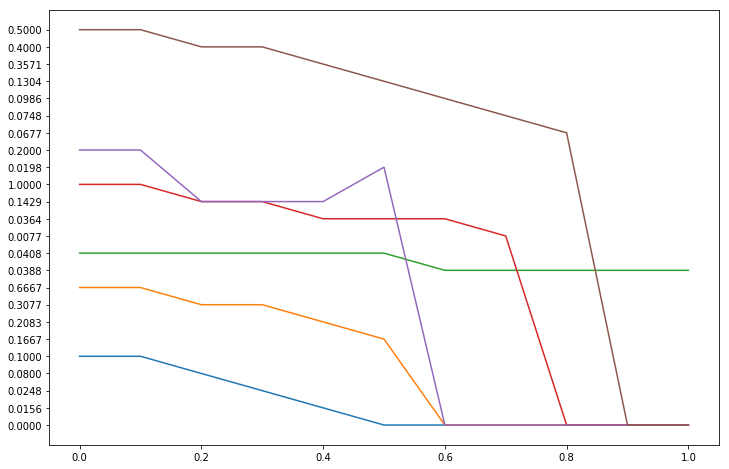

In [182]:
# get all the query Ids that exist in our dataframe
QueryIds = df.index.levels[0]
fig,ax = plt.subplots(1,figsize=(12,8))
#plot the precision-recall curve for the first n ids
for query in range(0,6):
    y = df.loc[idx[QueryIds[query],iprec_at_recallN], 'Value'].values
    plt.plot(x,y)